# Khám phá dữ liệu

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns # seaborn là thư viện được xây trên matplotlib, giúp việc visualization đỡ khổ hơn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPClassifier
from sklearn import set_config
set_config(display='diagram') # Để trực quan hóa pipeline

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
raw_used_car_df = pd.read_csv('raw_data.csv', sep = '\t')
raw_used_car_df.head()

,make,model,body style,year,mileage,engine,fuel type,number of owners,price
0,Honda,Odyssey,Touring Elite,2013,"122,986",3.5L V-6 Gas,Gas,2.0,"12,895"
1,Honda,Pilot,EX FWD,2013,"80,532",3.5L V-6 Gas,Gas,3.0,"11,694"
2,Honda,CR-V,LX FWD,2013,"79,796",2.4L Inline-4 Gas,Gas,1.0,"13,590"
3,Honda,Civic,LX Sedan Automatic,2013,"76,882",1.8L Inline-4 Gas,Gas,1.0,"7,986"
4,Honda,Civic,LX Sedan Automatic,2013,"113,673",1.8L Inline-4 Gas,Gas,1.0,"6,990"


## Dữ liệu có bao nhiêu dòng, bao nhiêu cột?

In [3]:
raw_used_car_df.shape

(4800, 9)

## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng ý nghĩa khác nhau không?

Mỗi dòng cho biết thông tin cơ bản về 1 chiếc xe

Các dòng có ý nghĩa là giống nhau

### Dữ liệu có các dòng bị lặp không?

In [4]:
raw_used_car_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4795    False
4796    False
4797    False
4798    False
4799    False
Length: 4800, dtype: bool

In [5]:
# Bao nhiêu dòng bị lặp?
num_row_dup = raw_used_car_df.duplicated().sum()
num_row_dup

148

In [6]:
# Dòng nào bị lặp?
duplicated_rows = raw_used_car_df[raw_used_car_df.duplicated()]
duplicated_rows

,make,model,body style,year,mileage,engine,fuel type,number of owners,price
393,Honda,Accord,EX-L Sedan I4 CVT,2016,"66,848",2.4L Inline-4 Gas,Gas,2.0,"15,995"
394,Honda,Pilot,EX-L AWD,2016,"124,363",3.5L V-6 Gas,Gas,1.0,"17,792"
395,Honda,Civic,EX Sedan CVT,2016,"79,118",2.0L Inline-4 Gas,Gas,2.0,"13,000"
396,Honda,Civic,LX Sedan CVT,2016,"53,433",2.0L Inline-4 Gas,Gas,1.0,"10,970"
397,Honda,Accord,EX-L V6 Sedan Automatic,2016,"98,855",3.5L V-6 Gas,Gas,1.0,"12,995"
...,...,...,...,...,...,...,...,...,...
4233,Mazda,Mazda3,i Touring 4-Door Automatic,2015,"161,366",2.0L Inline-4 Gas,Gas,1.0,"6,990"
4234,Mazda,CX-5,Grand Touring AWD Automatic,2015,"81,477",2.5L Inline-4 Gas,Gas,1.0,"14,995"
4288,Mazda,CX-5,Grand Touring AWD Automatic,2015,"95,609",2.5L Inline-4 Gas,Gas,1.0,"12,955"
4658,Mazda,Mazda6,Touring Automatic,2019,"29,144",2.5L Inline-4 Gas,Gas,1.0,"19,200"


In [7]:
group_cars = raw_used_car_df.groupby(['make', 'model', 'body style', 'year'])

In [8]:
# Kiểm tra thử dòng 393 xem có đúng là dòng 393 bị lặp không?
# --> đúng, ta thấy dòng 393 bị lặp lại dòng 363 trong bảng dưới
group_cars.get_group(('Honda', 'Accord', 'EX-L Sedan I4 CVT', 2016))

,make,model,body style,year,mileage,engine,fuel type,number of owners,price
332,Honda,Accord,EX-L Sedan I4 CVT,2016,"195,707",2.4L Inline-4 Gas,Gas,1.0,"10,912"
346,Honda,Accord,EX-L Sedan I4 CVT,2016,"35,471",2.4L Inline-4 Gas,Gas,1.0,"15,793"
363,Honda,Accord,EX-L Sedan I4 CVT,2016,"66,848",2.4L Inline-4 Gas,Gas,2.0,"15,995"
378,Honda,Accord,EX-L Sedan I4 CVT,2016,"94,394",2.4L Inline-4 Gas,Gas,1.0,"11,900"
393,Honda,Accord,EX-L Sedan I4 CVT,2016,"66,848",2.4L Inline-4 Gas,Gas,2.0,"15,995"


In [9]:
# Bỏ đi các dòng bị lặp, gán vào dataframe mới
used_car_df = raw_used_car_df.drop_duplicates()

In [10]:
used_car_df.shape

(4652, 9)

In [11]:
# Kiểm tra lại dataframe mới có còn dòng nào bị lặp không?
num_dup = used_car_df.duplicated().sum()
num_dup

0

In [12]:
# Test
assert num_dup == 0
assert used_car_df.shape == (raw_used_car_df.shape[0] - num_row_dup, raw_used_car_df.shape[1])

### Mỗi cột có ý nghĩa gì?

In [13]:
used_car_df.head(1)

,make,model,body style,year,mileage,engine,fuel type,number of owners,price
0,Honda,Odyssey,Touring Elite,2013,"122,986",3.5L V-6 Gas,Gas,2.0,"12,895"


* <b>Cột "make"</b>:             tên hãng xe
* <b>Cột "model"</b>:            tên dòng xe
* <b>Cột "body style"</b>:       dáng xe (kết cấu thân xe)
* <b>Cột "year"</b>:             năm sản xuất chiếc xe
* <b>Cột "mileage"</b>:          tổng số dặm xe đã đi
* <b>Cột "engine"</b>:           thông số động cơ xe
* <b>Cột "fuel type"</b>:        xe đi loại nhiên liệu gì?
* <b>Cột "number of owners"</b>: xe đã qua tay bao nhiêu đời chủ rồi?
* <b>Cột "price"</b>:            giá thành xe hiện được bán

# Đặt câu hỏi

**Câu hỏi:** làm sao để dự đoán giá trị của một chiếc xe cũ, đã qua sử dụng dựa trên các thông số của chiếc xe đó?

Câu hỏi này giải quyết được 2 vấn đề trong thực tế:
* Cho các người chủ muốn bán xe:
    * Họ ước lượng trước được giá trị của chiếc xe mà mình muốn bán dựa trên giá thị trường hiện tại. Để khi đến bất kì nơi bán nào, họ có thể thương lượng giá cả tốt hơn
* Cho các đại lý mua bán xe cũ:
    * Biết được giá trị thị trường, để có thể thương lượng giá cả với người bán
    * Nếu đã sở hữu xe cũ --> có thể đưa ra giá trị chiếc xe để bán đi

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để xử lý tiếp không?

In [14]:
dtypes = used_car_df.dtypes
dtypes

make                 object
model                object
body style           object
year                  int64
mileage              object
engine               object
fuel type            object
number of owners    float64
price                object
dtype: object

Trong Pandas, kiểu dữ liệu "object" thường ám chỉ chuỗi. Tuy nhiên, "object" có thể ám chỉ một kiểu dữ liệu bất kỳ. "object" giống như con trỏ, có thể trỏ tới một đối tượng bất kỳ

Để biết chính xác kiểu dữ liệu đang được lưu, tiến hành lấy giá trị từng cột để xem

In [15]:
print('make:', type(used_car_df.loc[0, 'make']))
print('model:', type(used_car_df.loc[0, 'model']))
print('body style:', type(used_car_df.loc[0, 'body style']))
print('mileage:', type(used_car_df.loc[0, 'mileage']))
print('engine:', type(used_car_df.loc[0, 'engine']))
print('fuel type:', type(used_car_df.loc[0, 'fuel type']))
print('price:', type(used_car_df.loc[0, 'price']))

make: <class 'str'>
model: <class 'str'>
body style: <class 'str'>
mileage: <class 'str'>
engine: <class 'str'>
fuel type: <class 'str'>
price: <class 'str'>


#### Một vài đánh giá về giá trị cột để tiền xử lý kiểu dữ liệu của cột

* <b>Cột "mileage"</b>, <b>"price"</b>: ta cần dữ liệu dạng số thực, mà ở đây đang ở dạng chuỗi --> tiến hành tiền xử lý để đưa từ kiểu chuỗi sang số thực

# Tiền xử lý

## Chuyển kiểu dữ liệu cột "mileage", "price" sang kiểu số thực

In [16]:
# bỏ dấu phẩy
used_car_df.loc[:, 'mileage'] = used_car_df.loc[:, 'mileage'].str.replace(',', '')
used_car_df.loc[:, 'price'] = used_car_df.loc[:, 'price'].str.replace(',', '')

In [17]:
# chuyển sang kiểu float
used_car_df['mileage'] = used_car_df['mileage'].astype(float)
used_car_df['price'] = used_car_df['price'].astype(float)
used_car_df

,make,model,body style,year,mileage,engine,fuel type,number of owners,price
0,Honda,Odyssey,Touring Elite,2013,122986.0,3.5L V-6 Gas,Gas,2.0,12895.0
1,Honda,Pilot,EX FWD,2013,80532.0,3.5L V-6 Gas,Gas,3.0,11694.0
2,Honda,CR-V,LX FWD,2013,79796.0,2.4L Inline-4 Gas,Gas,1.0,13590.0
3,Honda,Civic,LX Sedan Automatic,2013,76882.0,1.8L Inline-4 Gas,Gas,1.0,7986.0
4,Honda,Civic,LX Sedan Automatic,2013,113673.0,1.8L Inline-4 Gas,Gas,1.0,6990.0
...,...,...,...,...,...,...,...,...,...
4795,Mazda,CX-5,Grand Touring FWD,2020,13964.0,2.5L Inline-4 Gas,Gas,1.0,23888.0
4796,Mazda,CX-5,Sport FWD,2020,3759.0,2.5L Inline-4 Gas,Gas,1.0,22498.0
4797,Mazda,CX-5,Sport FWD,2020,9916.0,2.5L Inline-4 Gas,Gas,1.0,21990.0
4798,Mazda,CX-9,Grand Touring AWD,2020,5176.0,2.5L Inline-4 Gas Turbocharged,Gas,1.0,36992.0


## Khám phá dữ liệu (để biết cách tách các tập)
Để biết cách tách các tập thì ta cần khám phá thêm cột output một ít:
- Cột này có giá trị thiếu không? Nếu có giá trị thiếu thì ta sẽ xử lý rồi mới tách các tập 

In [18]:
#Cột output có giá trị thiếu không?
used_car_df['price'].isna().sum()

5

In [19]:
#Xử lý cột output bằng cách loại bỏ các dòng mà thiếu giá trị price
used_car_df = used_car_df[used_car_df['price'].notna()]

In [20]:
# test xem cột price đã hết giá trị thiếu chưa
used_car_df['price'].isna().sum()

0

In [21]:
used_car_df.shape

(4647, 9)

In [22]:
#Phân bố cột output như thế nào?
used_car_df['price'].describe()

count      4647.000000
mean      17377.042608
std       10211.005659
min        2996.000000
25%       10747.500000
50%       14590.000000
75%       20899.500000
max      129982.000000
Name: price, dtype: float64

## Tiền xử lý (tách các tập)

Bây giờ ta sẽ thực hiện bước tiền xử lý là tách tập validation và tập kiểm tra ra

In [23]:
# Tách X và y
used_car_y_sr = used_car_df["price"]
used_car_X_df = used_car_df.drop(columns = ['price'], axis=1)

In [24]:
# Tách tập train và tập validation, tập test theo tỉ lệ 60%:20%:20%

# Đầu tiên tách tập train 60% và tập temp 40%
train_X_df, temp_X_df, train_y_sr, temp_y_sr = train_test_split(used_car_X_df, used_car_y_sr, test_size=0.4, random_state=42)

#Tách tập temp thành 2 tập bằng nhau 50% (tức là 20%:20% như ban đầu)
val_X_df, test_X_df, val_y_sr, test_y_sr = train_test_split(temp_X_df, temp_y_sr, test_size=0.5, random_state=42)

Tập train

In [25]:
train_X_df.shape

(2788, 8)

In [26]:
train_y_sr.shape

(2788,)

Tập validation

In [27]:
val_X_df.shape

(929, 8)

In [28]:
val_y_sr.shape

(929,)

Tập test

In [29]:
test_X_df.shape

(930, 8)

In [30]:
test_y_sr.shape

(930,)

# Quay lại bước khám phá dữ liệu (Tập huấn luyện)

## Với mỗi cột có dữ liệu dạng số (numeric), các giá trị được phân bố như thế nào?  

In [31]:
train_X_df.head()

,make,model,body style,year,mileage,engine,fuel type,number of owners
3835,Toyota,Corolla,L CVT,2019,36937.0,1.8L Inline-4 Gas,Gas,2.0
968,Ford,Fusion,Energi Titanium FWD,2014,54054.0,2.0L Inline-4 Plug-In Hybrid,Plug-In Hybrid,2.0
1183,Ford,F-150,XL SuperCrew 6.5' Box RWD,2016,75062.0,2.7L V-6 Gas Turbocharged,Gas,1.0
384,Honda,Fit,LX CVT,2016,24070.0,1.5L Inline-4 Gas,Gas,3.0
2822,Mercedes-Benz,E-Class,E 300 Luxury 4MATIC Sedan,2017,54635.0,2.0L Inline-4 Gas Turbocharged,Gas,1.0


In [32]:
train_X_df.describe()

,year,mileage,number of owners
count,2788.000000,2788.000000,2787.000000
mean,2016.507532,60744.702654,1.499103
std,2.284002,40917.086294,0.791816
min,2013.000000,5.000000,0.000000
25%,2014.000000,29219.500000,1.000000
50%,2017.000000,52173.000000,1.000000
75%,2019.000000,88003.750000,2.000000
max,2020.000000,257866.000000,6.000000


In [33]:
train_X_df.dtypes

make                 object
model                object
body style           object
year                  int64
mileage             float64
engine               object
fuel type            object
number of owners    float64
dtype: object

### Bảng mô tả

In [34]:
numeric_cols_df = train_X_df.select_dtypes(exclude = 'object')

def missing_ratio(col):
    return col.isna().mean() * 100

def median(col):
    return col.quantile(0.5)

def lower_quartile(col):
    return col.quantile(0.25)

def upper_quartile(col):
    return col.quantile(0.75)

numeric_cols_df.agg([missing_ratio, min, lower_quartile, median, upper_quartile, max])

,year,mileage,number of owners
missing_ratio,0.0,0.00,0.035868
min,2013.0,5.00,0.000000
lower_quartile,2014.0,29219.50,1.000000
median,2017.0,52173.00,1.000000
upper_quartile,2019.0,88003.75,2.000000
max,2020.0,257866.00,6.000000


Vẽ Histogram minh họa trực quan cho giá trị của từng cột

### Biểu đồ histogram biểu thị mối liên hệ giữa: tổng số dặm và số lượng xe

Text(0, 0.5, 'Số xe')

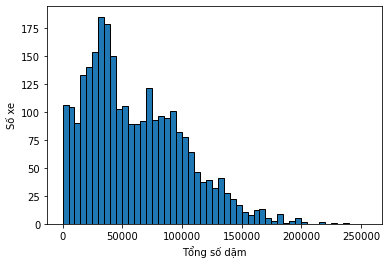

In [35]:
train_X_df['mileage'].plot.hist(bins = range(5, 260000, 5000), edgecolor = 'black')
plt.xlabel('Tổng số dặm')
plt.ylabel('Số xe')

## Với mỗi cột có kiểu dữ liệu không phải dạng số (ở đây chủ yếu ta ám chỉ dạng categorical), các giá trị được phân bố như thế nào? 

### Bảng mô tả

In [36]:
cate_cols_df = train_X_df.select_dtypes(include = 'object')

def value_counts(col):
    return dict(col.value_counts())

# tỉ lệ giá trị thiếu, số lượng giá trị duy nhất, thống kê giá trị duy nhất
category_stat = cate_cols_df.agg([missing_ratio, pd.Series.nunique, value_counts])
pd.set_option('display.max_colwidth', 10000)
category_stat

,make,model,body style,engine,fuel type
missing_ratio,0,0,0,0,0
nunique,6,99,619,53,7
value_counts,"{'Toyota': 487, 'Mazda': 479, 'Hyundai': 478, 'Mercedes-Benz': 470, 'Ford': 448, 'Honda': 426}","{'CX-5': 220, 'Elantra': 193, 'Civic': 152, 'Corolla': 145, 'Mazda3': 134, 'C-Class': 129, 'Camry': 119, 'Sonata': 110, 'F-150': 103, 'Accord': 103, 'CR-V': 73, 'Fusion': 72, 'E-Class': 68, 'Tucson': 66, 'Mazda6': 66, 'Super Duty F-250': 60, 'RAV4': 57, 'GLC': 55, 'Focus': 37, 'Prius': 33, 'Escape': 33, 'Accent': 33, 'GLA': 32, 'GLE': 31, 'Edge': 30, 'Tacoma': 28, 'CX-9': 27, 'Odyssey': 26, 'Santa Fe': 26, 'Pilot': 25, 'Sienna': 25, 'Transit Passenger Wagon': 24, 'Santa Fe Sport': 24, 'CLA': 24, 'Explorer': 22, 'HR-V': 22, 'Super Duty F-350': 19, 'M-Class': 17, 'Fiesta': 16, 'Highlander': 16, 'S-Class': 15, '4Runner': 14, 'GLK': 14, 'Veloster': 13, 'GL': 13, 'Tundra': 12, 'CX-3': 11, 'A-Class': 10, 'Fit': 9, 'GLS': 9, 'Mazda5': 8, 'Avalon': 8, 'Mustang': 8, 'SL': 8, 'Prius c': 8, 'Metris Passenger Van': 7, 'Metris Cargo Van': 7, 'Ridgeline': 7, 'Sprinter Cargo Van': 6, 'GLB': 6, 'MX-5 Miata': 6, 'C-Max': 5, 'Mazda2': 5, 'Genesis Coupe': 5, 'Venza': 5, 'Insight': 4, 'Super Duty F-350 Chassis Cab': 4, 'Yaris': 4, 'B-Class': 3, 'SLK': 3, 'Passport': 3, 'G-Class': 3, 'Mirai': 3, 'Transit Cargo Van': 3, 'Expedition': 3, 'Taurus': 3, 'Sprinter Passenger Van': 3, 'Genesis': 3, 'Prius v': 3, 'CX-30': 2, 'Azera': 2, 'Kona': 2, 'CLS': 2, 'Transit Connect Van': 2, 'Econoline Commercial Cutaway': 2, 'Corolla iM': 2, 'Sprinter Chassis Cabs': 2, 'Yaris iA': 2, '86': 1, 'Equus': 1, 'Sprinter Crew Van': 1, 'C-HR': 1, 'CR-Z': 1, 'Prius Prime': 1, 'AMG GT': 1, 'SLC': 1, 'Ranger': 1, 'Clarity': 1, 'Transit Cutaway': 1}","{'LE CVT': 75, 'SE FWD': 65, 'LX Sedan CVT': 59, 'Touring FWD': 43, 'C 300 Sedan RWD': 40, 'SEL 2.0L IVT': 39, 'Grand Touring FWD': 38, 'XLT SuperCrew 5.5' Box 4WD': 33, 'Grand Touring AWD': 33, 'SE Sedan Automatic': 33, 'SE I4 Automatic': 31, 'C 300 4MATIC Sedan': 28, 'Touring Automatic': 26, 'Touring AWD': 25, 'SE 2.4L': 25, 'GLC 300 SUV RWD': 25, 'SE Sedan': 24, 'GLS Sedan Automatic': 24, 'SE AWD': 24, 'i Sport 4-Door Automatic': 22, 'SEL FWD': 22, 'Sport FWD': 22, 'Limited FWD': 21, 'SEL 2.0L Sedan Automatic': 20, 'E 350 4MATIC Luxury Sedan': 20, 'EX Sedan CVT': 20, 'Two': 19, 'Grand Touring AWD Automatic': 18, 'Sport 1.5T CVT': 18, 'L Automatic': 17, 'CLA 250 FWD': 17, 'EX AWD': 17, 'GLA 250 4MATIC': 17, 'E 350 Sport Sedan RWD': 17, 'Sport AWD': 17, 'i Touring 4-Door Automatic': 17, 'EX-L FWD': 16, 'LX Sedan I4 CVT': 16, 'C 250 Sport Sedan RWD': 16, 'EX-L AWD': 16, 'SE Hatchback': 16, 'Touring FWD Automatic': 15, 'C 300 4MATIC Sport Sedan': 15, 'i Touring Automatic': 15, 'LE I4 Automatic': 14, 'LX Sedan Automatic': 14, 'SE Automatic': 14, 'SEL 2.0L Automatic': 14, 'Standard Roof 126"" Wheelbase': 14, 'SE CVT': 14, 'Value Edition 2.0L Sedan Automatic': 14, 'GLE 350 SUV RWD': 14, 'EX-L': 14, 'GLA 250 FWD': 14, 'Touring AWD Automatic': 13, 'i Touring 5-Door Automatic': 13, 'GLC 300 RWD': 13, 'XLE AWD': 13, 'SE 2.0L Sedan Automatic': 12, 'EX-L Sedan I4 CVT': 12, 'Grand Touring FWD Automatic': 12, 'Titanium AWD': 12, 'LE FWD': 12, 'LX FWD': 12, '2014 SE I4 Automatic': 12, 'Four': 12, 'EX FWD': 12, 'Base 2.4L FWD': 11, 'i Grand Touring Automatic': 11, 'LE Automatic': 11, 'C 300 Sedan 4MATIC': 11, 'Touring 4-Door Automatic': 11, 'Sport Sedan CVT': 11, 'XLE FWD': 11, 'Sport Sedan I4 CVT': 11, 'EX-L Sedan CVT': 10, 'L CVT': 10, 'ML 350 4MATIC': 10, 'Sport Automatic': 10, 'Hybrid SE FWD': 10, 'XLE I4 Automatic': 10, 'Sport 2.4L': 10, 'Hybrid Limited 2.4L': 9, 'A 220 FWD': 9, 'GLS 2.4L Automatic': 9, 'Sport 4-Door Automatic': 9, 'XL SuperCrew 5.5' Box 4WD': 9, 'E 350 Sedan RWD': 8, 'SEL AWD': 8, 'Limited AWD': 8, 'Lariat SuperCrew 5.5' Box 4WD': 8, 'SE 2.0L Sedan Automatic (alt)': 8, 'Lariat 4WD Crew Cab 6.75' Box': 8, 'GLK 350 RWD': 8, 'GL 450 4MATIC': 8, 'SE 2.4L (PZEV)': 8, 'LE Auto Access Seat 7-Passenger FWD': 8, 'Limited 2.4L': 7, 'GT 

### Biểu đồ bar chart thể hiện số lượng xe của từng hãng

Text(0.5, 0, 'Số xe')

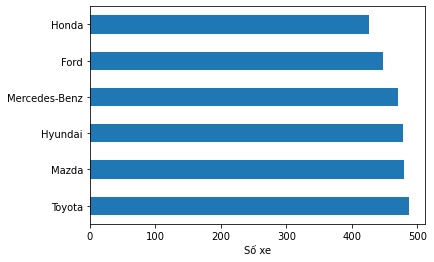

In [37]:
train_X_df['make'].value_counts().plot.barh()
plt.xlabel('Số xe')

### Biểu đồ bar chart thể hiện mỗi quan hệ giữa: loại nhiên liệu và số lượng xe

Text(0.5, 0, 'Số xe')

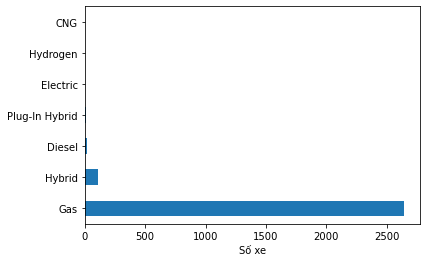

In [38]:
train_X_df['fuel type'].value_counts().plot.barh()
plt.xlabel('Số xe')

# Tiền xử lý (Tập huấn luyện)

- Xóa cột "body style"
- Giảm sự phức tạp của cột engine bằng cách chỉ lấy thông số lít(L) của động cơ
- Xử lý giá trị thiếu ở các cột
- Cột Xử lý cột "number of owners"
- Cột "number of owners" có giá trị min = 0 - nghĩa là xe cũ nhưng vẫn chưa có chủ sở hữu --> không phù hợp với tiêu chí thực hiện của. Chúng ta đang dự đoán giá xe mà đã qua sử dụng
--> Giá trị trong cột "number of owners" mà bằng 0 thì ta sẽ gán cho nó = 1

Ta thấy cột **"body style"** có quá nhiều giá trị có thể xảy ra nên có thể dẫn đến phức tạp cho mô hình dự đoán, ta phải xử lý nó bằng cách:
* Xóa cột đó khỏi dataframe, ta không dự đoán giá trị chiếc xe trên thuộc tính **"body style"** nữa

In [39]:
# bỏ cột "body style"
train_X_df = train_X_df.drop(columns = ['body style'], axis = 1)
train_X_df

,make,model,year,mileage,engine,fuel type,number of owners
3835,Toyota,Corolla,2019,36937.0,1.8L Inline-4 Gas,Gas,2.0
968,Ford,Fusion,2014,54054.0,2.0L Inline-4 Plug-In Hybrid,Plug-In Hybrid,2.0
1183,Ford,F-150,2016,75062.0,2.7L V-6 Gas Turbocharged,Gas,1.0
384,Honda,Fit,2016,24070.0,1.5L Inline-4 Gas,Gas,3.0
2822,Mercedes-Benz,E-Class,2017,54635.0,2.0L Inline-4 Gas Turbocharged,Gas,1.0
...,...,...,...,...,...,...,...
4577,Mazda,Mazda3,2018,44759.0,2.0L Inline-4 Gas,Gas,1.0
508,Honda,Civic,2018,37587.0,2.0L Inline-4 Gas,Gas,1.0
3234,Toyota,Avalon,2013,132751.0,3.5L V-6 Gas,Gas,1.0
3916,Toyota,Camry,2020,27133.0,2.5L Inline-4 Gas,Gas,1.0


In [40]:
# lấy thông số lít và chuyển nó sang kiểu số thực
train_X_df['engine'] = train_X_df['engine'].str.extract(r'(\d+.\d+L)')
train_X_df['engine'] = train_X_df['engine'].str.replace('L', '').astype(float)
train_X_df

,make,model,year,mileage,engine,fuel type,number of owners
3835,Toyota,Corolla,2019,36937.0,1.8,Gas,2.0
968,Ford,Fusion,2014,54054.0,2.0,Plug-In Hybrid,2.0
1183,Ford,F-150,2016,75062.0,2.7,Gas,1.0
384,Honda,Fit,2016,24070.0,1.5,Gas,3.0
2822,Mercedes-Benz,E-Class,2017,54635.0,2.0,Gas,1.0
...,...,...,...,...,...,...,...
4577,Mazda,Mazda3,2018,44759.0,2.0,Gas,1.0
508,Honda,Civic,2018,37587.0,2.0,Gas,1.0
3234,Toyota,Avalon,2013,132751.0,3.5,Gas,1.0
3916,Toyota,Camry,2020,27133.0,2.5,Gas,1.0


In [42]:
train_X_df.dtypes

make                 object
model                object
year                  int64
mileage             float64
engine              float64
fuel type            object
number of owners    float64
dtype: object

In [41]:
# Đưa vào class ColAdderDropper